
# Project: TMDB movie data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 TMDB movie is a dataset that contains a list of movies, movie actors, their release dates and their budgets and revenues. In this analysis we will explore if the runtime affects its revenue and the kinds of properties associated with movies that have high revenues.

 I will explore the following questions with respect to this analysis:
 1. Does runtime of a movie affects its revenue? 
 2. How investment in a movie affects its revenue and profitability?
 3. Which genres are most popular from year to year?
 
In this analysis, profitability of the movies and their revenues will be my independent variable while runtime, budget and genres will my dependent variables.


In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 
 
### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
### Checking the data types and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can observe that there are many coumns with missing values. 


<a id='wrangling'></a>
### Printing the dimensions of the dataset

The TMDB dataset contains 10866 observations and 21 variable or columns

In [4]:
df.shape

(10866, 21)

<a id='wrangling'></a>
### Data cleaning
Printing the column names

In [5]:
df.keys()

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
# checking total number of duplicates
df.duplicated().sum()

1

<a id='wrangling'></a>
#### We will drop the columns that are not used in our analysis

In [7]:
# dropping unuseful columns
df.drop(['id', 'imdb_id','homepage', 'director', 'tagline', 'keywords', 'overview',
'production_companies','vote_count', 'vote_average','cast'],axis =1, inplace = True)


In [8]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   release_year    10866 non-null  int64  
 8   budget_adj      10866 non-null  float64
 9   revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 849.0+ KB


 <a id='wrangling'></a>
 Confirming the useful columns and their non null columns


<a id='wrangling'></a>
### Checking the summary of the dataset

In [10]:
df.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


We can observe several zero values in the budget,revenue, runtime, budget_adj and revenue_adj

<a id='wrangling'></a>
### Dropping all null values which are present in the genres column

In [11]:
# drop all null values 
df.dropna(inplace = True)

In [12]:
# checking null values 
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [13]:
# changing the release _date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,1.385749e+09


In [14]:
#convert budget, revenue, budget_adj and revenue_adj in millions
df['budget'] = df['budget']/1000000
df['revenue'] = df['revenue']/1000000
df['budget_adj'] = df['budget_adj']/1000000
df['revenue_adj'] = df['revenue_adj']/1000000


In [15]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150.0,1513.528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137.999939,1392.445893
1,28.419936,150.0,378.436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137.999939,348.161292
2,13.112507,110.0,295.238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101.199955,271.619025
3,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,183.999919,1902.723130
4,9.335014,190.0,1506.249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,174.799923,1385.748801


In [16]:
#printing column names again
df.keys()

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : How the runtime of movies affect the revenue and profitability?

### Distribution of certain variables

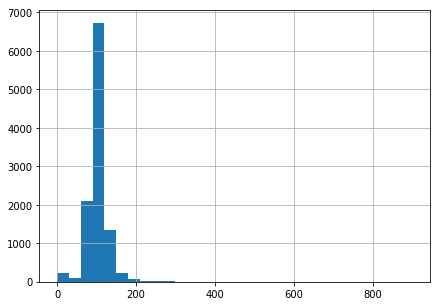

In [17]:
# plot histogram 
df['runtime'].hist(bins=30,figsize=(7,5));

<a id='wrangling'></a>
### A scatter plot of revenue against runtime

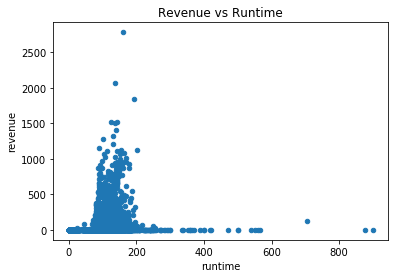

In [18]:
#Revenue vs Runtime
df.plot(x = 'runtime', y = 'revenue' ,kind = 'scatter', title = 'Revenue vs Runtime');

here we can see that movies that have a runtime of about 150-180 have reported high revenues.

In [19]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150.0,1513.528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137.999939,1392.445893
1,28.419936,150.0,378.436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137.999939,348.161292
2,13.112507,110.0,295.238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101.199955,271.619025
3,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,183.999919,1902.723130
4,9.335014,190.0,1506.249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,174.799923,1385.748801


### Research Question 2 : How genres of movies affect the profitability?

In [20]:
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head(10)

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150.0,1513.528810,Jurassic World,124,Action,2015-06-09,2015,137.999939,1392.445893
0,32.985763,150.0,1513.528810,Jurassic World,124,Adventure,2015-06-09,2015,137.999939,1392.445893
0,32.985763,150.0,1513.528810,Jurassic World,124,Science Fiction,2015-06-09,2015,137.999939,1392.445893
0,32.985763,150.0,1513.528810,Jurassic World,124,Thriller,2015-06-09,2015,137.999939,1392.445893
1,28.419936,150.0,378.436354,Mad Max: Fury Road,120,Action,2015-05-13,2015,137.999939,348.161292
1,28.419936,150.0,378.436354,Mad Max: Fury Road,120,Adventure,2015-05-13,2015,137.999939,348.161292
1,28.419936,150.0,378.436354,Mad Max: Fury Road,120,Science Fiction,2015-05-13,2015,137.999939,348.161292
1,28.419936,150.0,378.436354,Mad Max: Fury Road,120,Thriller,2015-05-13,2015,137.999939,348.161292
2,13.112507,110.0,295.238201,Insurgent,119,Adventure,2015-03-18,2015,101.199955,271.619025
2,13.112507,110.0,295.238201,Insurgent,119,Science Fiction,2015-03-18,2015,101.199955,271.619025


In [21]:
# group exploded dataframe by genres
genres_df.groupby('genres').popularity.mean()

genres
Action             0.926136
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744821
Documentary        0.181432
Drama              0.591496
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001218
TV Movie           0.270896
Thriller           0.741513
War                0.727683
Western            0.590615
Name: popularity, dtype: float64

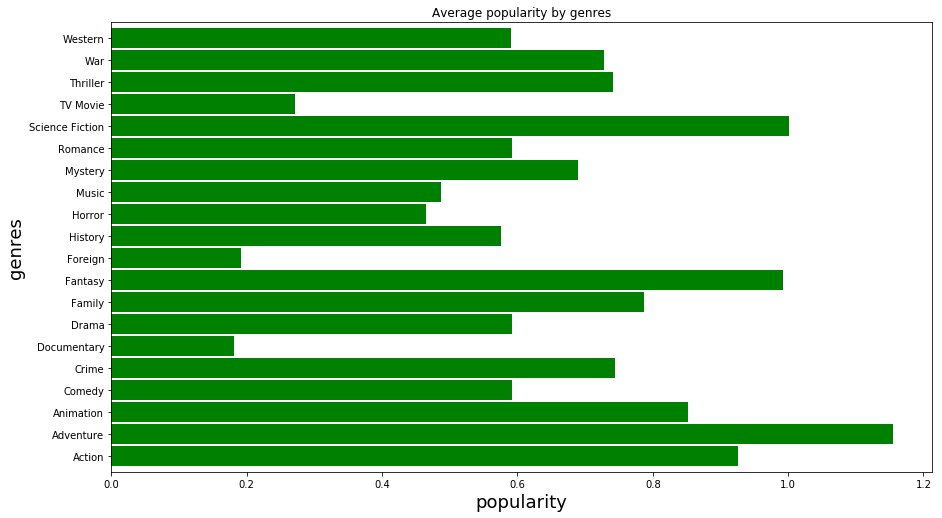

In [23]:
# groupby genres, get average popularity, get average popularity(or any of the continuous variable) and plot
genres_df.groupby('genres').popularity.mean().plot.barh(color=['g'],width = 0.9,figsize = [14.70,8.27], rot = 0,
                                                           title = 'Average popularity by genres')

# titles/labels
plt.xlabel('popularity', fontsize=18)
plt.ylabel('genres', fontsize=18);

According to the chart above, adventure, science fiction, fantasy, action and animation were the the most popular genres by average

<a id='wrangling'></a>
### Research Question 2  How investment in a movie affects its revenue?

In [26]:
#adding a profit_adj and a profit column
df['profit'] = df['revenue']-df['budget']

df['profit_adj'] = df['revenue_adj']-df['budget_adj']
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150.0,1513.528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137.999939,1392.445893,1363.528810,1254.445953
1,28.419936,150.0,378.436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137.999939,348.161292,228.436354,210.161353
2,13.112507,110.0,295.238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101.199955,271.619025,185.238201,170.419070
3,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,183.999919,1902.723130,1868.178225,1718.723211
4,9.335014,190.0,1506.249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,174.799923,1385.748801,1316.249360,1210.948878


<a id='wrangling'></a>
### A scatter plot of revenue against budget 

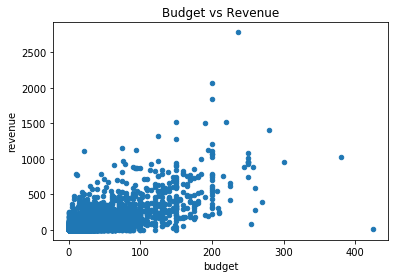

In [30]:
#Budget vs Revenue
df.plot(x = 'budget' , y = 'revenue', kind = 'scatter', title = 'Budget vs Revenue');



We can observe that as the budget for a particular movie increases the revenue also increases





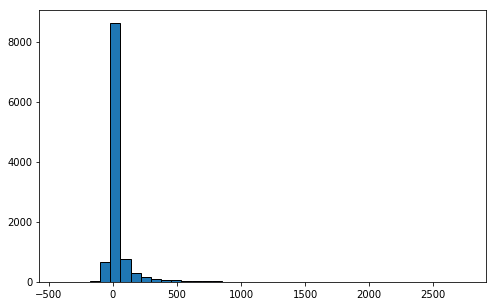

In [31]:
df['profit_adj'].hist(grid = False ,bins=40,edgecolor='black',figsize=[8,5]);

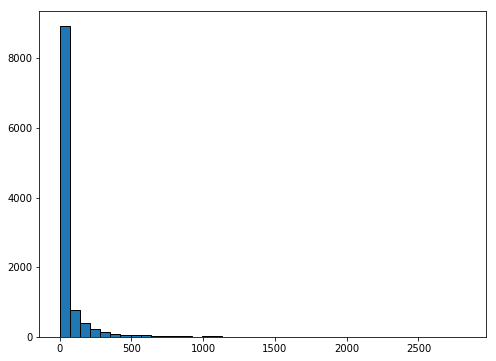

In [32]:
df['revenue_adj'].hist(grid = False ,bins=40,edgecolor='black',figsize=[8,6]);

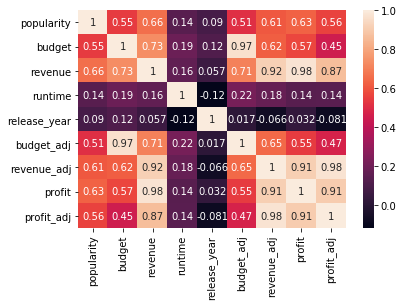

In [33]:
sns.heatmap(df.corr(),annot = True);

There is a bigger correlation between all the columns associated with the profitability.

<a id='wrangling'></a>
###  Visualising using Sum

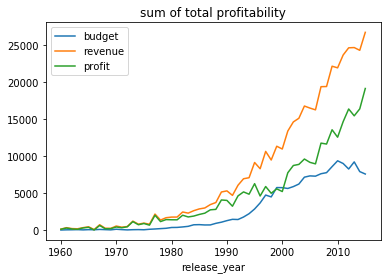

In [34]:
df.groupby('release_year')[['budget','revenue','profit']].sum().plot(kind= 'line', title= 'sum of total profitability');

The sum is affected by two things:

 i. The number of movies each year &
 
 ii. the typical profit, budget and revenue for each year.
 

<a id='wrangling'></a>
### Visualising using Average

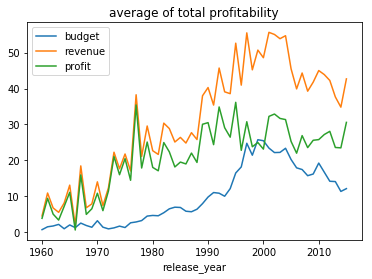

In [35]:
df.groupby('release_year')[['budget','revenue','profit']].mean().plot(kind= 'line', title= 'average of total profitability');

The average is not affected by number of movies each year.

<a id='wrangling'></a>
### Visualising budget_adj, revenue_adj and profit_adj using sum

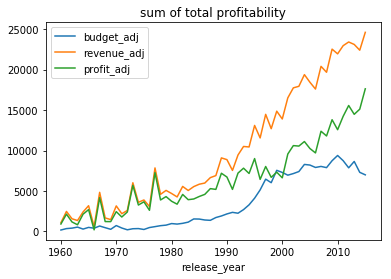

In [36]:
df.groupby('release_year')[['budget_adj','revenue_adj','profit_adj']].sum().plot(kind= 'line', title= 'sum of total profitability');

<a id='wrangling'></a>
### Visualising budget_adj, revenue_adj and profit_adj using mean

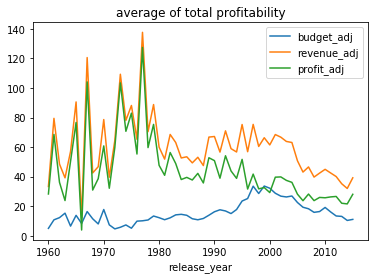

In [37]:
df.groupby('release_year')[['budget_adj','revenue_adj','profit_adj']].mean().plot(kind= 'line', title= 'average of total profitability');

There is an unusual pattern when comparing the $ values of these figures as you have noticed from the above cells. This is due to the reason that mean is not affected while sum is affected by the number of movies each year.


<a id='wrangling'></a>
### Visualising budget, revenue and profit by release_year

In [38]:
# a function to define the group plot

def myGrpPlot(df,grpVar,yVar,stat = 'sum'):
    
    # plot
    df.groupby([grpVar])[yVar].agg(stat).plot(figsize = [14,6]);
    
    # Add title and format it
    plt.title(f'{stat} of {" & ".join(yVar)} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    
    # Add x label and format it
    plt.xlabel(grpVar.title(), fontsize = 10, weight = "bold")
    
    # Add y label and format it
    plt.ylabel(f'{stat} {" & ".join (yVar)}'.title(), fontsize = 10, weight = "bold")

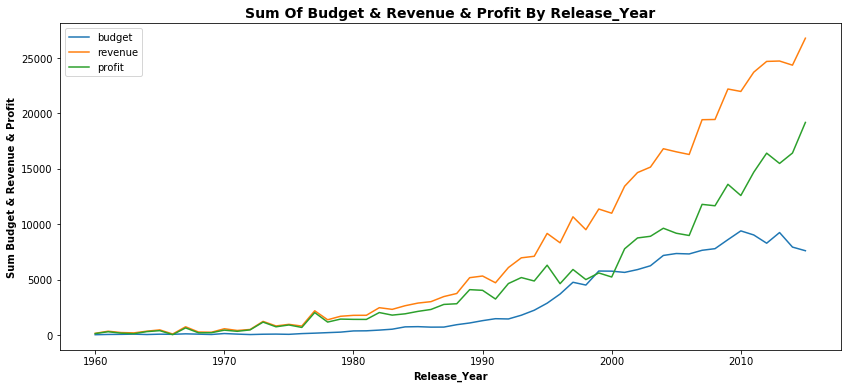

In [39]:
# plot for revenue, budget and revenue by release year
myGrpPlot(df,'release_year',['budget','revenue','profit'])

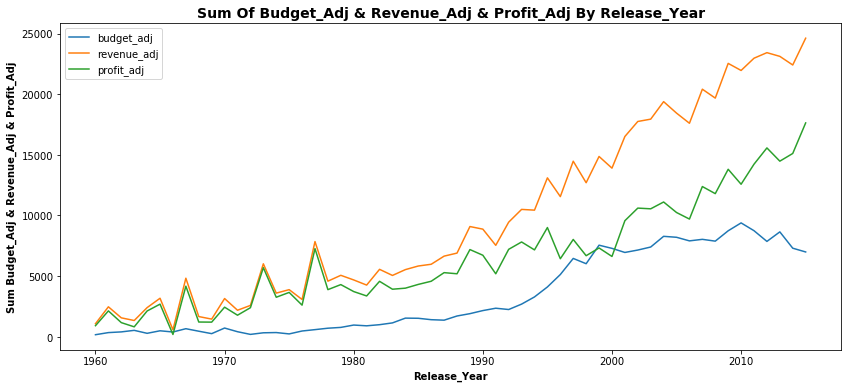

In [40]:
# plot for revenue_adj, budget_adj and revenue_adj by release year
myGrpPlot(df,'release_year',['budget_adj','revenue_adj','profit_adj'])

The profitability shows steady increase over the years

### Limitations

1. The genres column in this dataset have nulls values and have multiple genres for a particular type of movie but we used the split and explode methods before grouping them.
2. There are some columns that have zero values that have impacted our results in some way.



<a id='conclusions'></a>
## Conclusions

First we analysed how runtime affect the popularity of a movie by plotting a histogram and a scatterplot and the movies that had a runtime of 150-180 minutes had high margin. Then we analysed how genres have an impact on popularity and finally we analysed the sum and mean of total profitability by visualisation and we saw how sum is impacted while average does not. We can conclude that all the three varibles  at some point have an impact on the profitability of the movies.